<a href="https://colab.research.google.com/github/swetakb15/Data-Science-Projects/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

--2021-09-17 16:16:48--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2021-09-17 16:16:48--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc26e3972d532b5654046d0cad0f.dl.dropboxusercontent.com/cd/0/inline/BWVFU3o4T_hYZgEgZLgsAABeCKkPY1JyfelOSshdWrFZIu4PuA4ARmGudiQSHWPHxTqAPauf007pgQKD4B0xhkokcY21NFdcUiI-3O0PDDGZj8JPZYbZLl3L5f2z1UjrHv5hqmVVu_qg4x96xo4Na5eb/file# [following]
--2021-09-17 16:16:49--  https://uc26e3972d532b5654046d0cad0f.dl.dropboxusercontent.com/cd/0/inline/BWVFU3o4T_hYZgEgZLgsAABeCKkPY1JyfelOSshdWrFZIu4PuA4ARmGudiQSHWPHxTqAPauf007pgQKD4B0xhkokcY21NF

In [ ]:
!unzip train.zip?dl=0

Archive:  train.zip?dl=0
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Ha

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.models import Model #Functional API
from keras.layers import Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img

In [ ]:

# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
from keras.losses import categorical_crossentropy
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


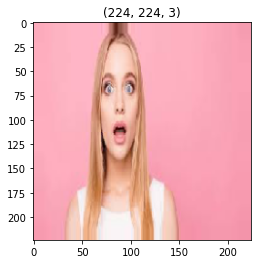

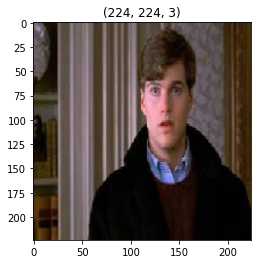

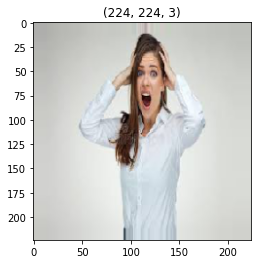

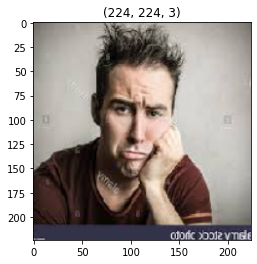

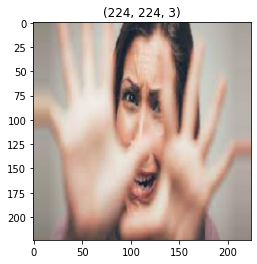

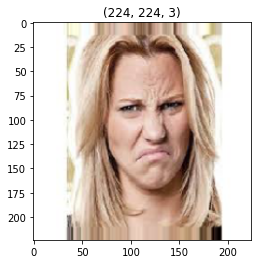

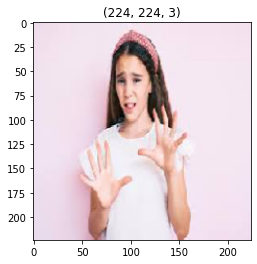

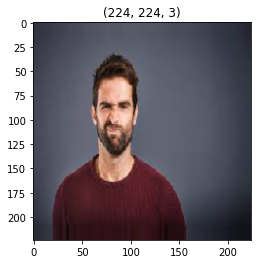

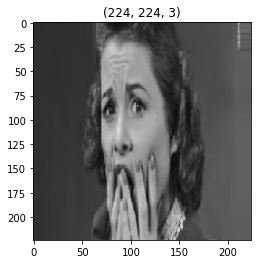

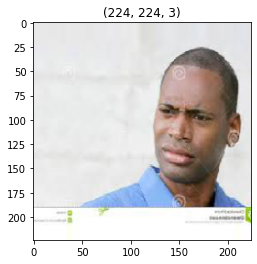

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# New Section

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 25s 2s/step - loss: 11.4713 - accuracy: 0.2610 - val_loss: 4.0325 - val_accuracy: 0.4766

Epoch 00001: val_accuracy improved from -inf to 0.47656, saving model to best_model.h5
Epoch 2/30
10/10 [==============================] - 23s 2s/step - loss: 3.8839 - accuracy: 0.5440 - val_loss: 2.3457 - val_accuracy: 0.6367

Epoch 00002: val_accuracy improved from 0.47656 to 0.63672, saving model to best_model.h5
Epoch 3/30
10/10 [==============================] - 23s 2s/step - loss: 2.1748 - accuracy: 0.6730 - val_loss: 0.6976 - val_accuracy: 0.8555

Epoch 00003: val_accuracy improved from 0.63672 to 0.85547, saving model to best_model.h5
Epoch 4/30
10/10 [==============================] - 23s 2s/step - loss: 0.7500 - accuracy: 0.8365 - val_loss: 0.3301 - val_accuracy: 0.9141

Epoch 00004: val_accuracy improved from 0.85547 to 0.91406, saving model to best_model.h5
Epoch 5/30
10/10 [==============================] - 23s 2s/step - loss: 0.4015

In [ ]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

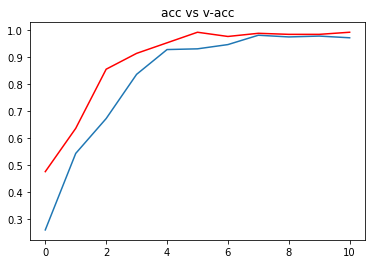

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

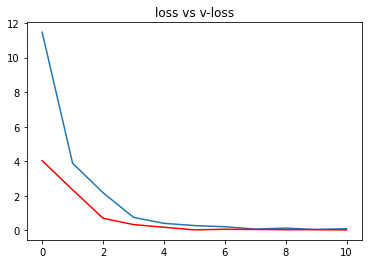

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of Happy


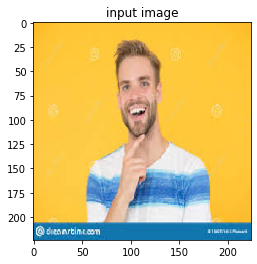

In [ ]:
# path for the image to see if it predics correct class

path = "/content/train/Happy/images.jpg"
img = load_img(path, target_size=(224,224))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

# New Section